In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df_movies = pd.read_csv("movies.dat", delimiter="::", header=None, names=['movie_id','movie_title (movie_year)','genre'])
df_movies[:2]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,movie_id,movie_title (movie_year),genre
0,2844,Fantômas - À l'ombre de la guillotine (1913),Crime|Drama
1,4936,The Bank (1915),Comedy|Short


In [3]:
df_ratings = pd.read_csv("ratings.dat", delimiter="::", header=None, names=['user_id','movie_id','rating','rating_timestamp'])
df_ratings[:2]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,user_id,movie_id,rating,rating_timestamp
0,1,1074638,7,1365029107
1,1,1853728,8,1366576639


In [4]:
df_users = pd.read_csv("users.dat", delimiter="::", header=None, names=['user_id','twitter_id'])
df_users[:2]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,user_id,twitter_id
0,1,18405182
1,2,31260677


In [5]:
df_master = df_ratings.merge(df_movies,on='movie_id').merge(df_users,on='user_id')
df_master[:2]

,user_id,movie_id,rating,rating_timestamp,movie_title (movie_year),genre,twitter_id
0,1,1074638,7,1365029107,Skyfall (2012),Action|Adventure|Crime|Thriller,18405182
1,1,1853728,8,1366576639,Django Unchained (2012),Adventure|Drama|Western,18405182


In [6]:
tmp = df_master["movie_title (movie_year)"].str.split('(', n = 1, expand = True) 
df_master['year'] = tmp[1].str.split(')', n = 1, expand = True)[0]
df_master['year'] = df_master['year'].astype(int)
df_master[:5]

,user_id,movie_id,rating,rating_timestamp,movie_title (movie_year),genre,twitter_id,year
0,1,1074638,7,1365029107,Skyfall (2012),Action|Adventure|Crime|Thriller,18405182,2012
1,1,1853728,8,1366576639,Django Unchained (2012),Adventure|Drama|Western,18405182,2012
2,27,1074638,7,1363449441,Skyfall (2012),Action|Adventure|Crime|Thriller,86540359,2012
3,27,1300854,8,1367341538,Iron Man 3 (2013),Action|Sci-Fi|Thriller,86540359,2013
4,27,1790885,9,1363449338,Zero Dark Thirty (2012),Drama|History|Thriller,86540359,2012


In [7]:
tmp = df_master[df_master.genre.isna()==False]['genre'].str.split('|').to_list()
all_genres = set() 
for x in tmp:
    for g in x:
        all_genres.add(g)
print(all_genres,len(all_genres))

{'Adventure', 'Western', 'Family', 'War', 'Action', 'Sport', 'Film-Noir', 'Documentary', 'Fantasy', 'Biography', 'News', 'Comedy', 'History', 'Music', 'Musical', 'Adult', 'Sci-Fi', 'Crime', 'Short', 'Romance', 'Mystery', 'Thriller', 'Horror', 'Drama', 'Animation'} 25


In [8]:
def split_genre(df, col='genre'):
    for ix, r in df.iterrows():
        try:
            for g in r[col].split('|'):
                df.at[ix,g] = r.rating
        except:
            continue

In [9]:
split_genre(df_master)    
df_master[:2]

,user_id,movie_id,rating,rating_timestamp,movie_title (movie_year),genre,twitter_id,year,Action,Adventure,Crime,Thriller,Drama,Western,Sci-Fi,History,Comedy,Romance,Biography,Music,Mystery,War,Horror,Sport,Fantasy,Animation,Family,Musical,Documentary,Film-Noir,News,Short,Adult
0,1,1074638,7,1365029107,Skyfall (2012),Action|Adventure|Crime|Thriller,18405182,2012,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1853728,8,1366576639,Django Unchained (2012),Adventure|Drama|Western,18405182,2012,NaN,8.0,NaN,NaN,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
tmp = df_master.groupby('year', as_index=False)
df_tmp = tmp[list(all_genres)].mean()
df_tmp

,year,Adventure,Western,Family,War,Action,Sport,Film-Noir,Documentary,Fantasy,Biography,News,Comedy,History,Music,Musical,Adult,Sci-Fi,Crime,Short,Romance,Mystery,Thriller,Horror,Drama,Animation
0,1898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,1913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,6.000000,NaN
2,1915,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.500000,8.000000,NaN,NaN,NaN,NaN,NaN,6.500000,8.000000,NaN,NaN,NaN,6.000000,NaN
3,1916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.500000,NaN,NaN,NaN,NaN,NaN,NaN,6.500000,NaN,NaN,NaN,NaN,NaN,NaN
4,1917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.500000,NaN,NaN,NaN,NaN,NaN,NaN,7.500000,8.000000,NaN,NaN,NaN,8.000000,NaN
5,1918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
6,1919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,10.000000,NaN
7,1920,6.000000,NaN,NaN,NaN,6.000000,5.000000,NaN,NaN,NaN,5.000000,NaN,6.750000,NaN,NaN,NaN,NaN,NaN,NaN,7.500000,7.000000,NaN,NaN,7.000000,6.000000,NaN
8,1921,NaN,NaN,8.750000,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,8.750000,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,7.000000,NaN,8.000000,8.500000,NaN
9,1922,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,7.000000,7.000000,NaN,7.000000,7.000000,7.625000,NaN,NaN


In [11]:
df_last_decade = df_tmp[df_tmp['year'] >= df_tmp['year'].max()-10]
df_last_decade = df_last_decade.set_index('year')
df_last_decade

,Adventure,Western,Family,War,Action,Sport,Film-Noir,Documentary,Fantasy,Biography,News,Comedy,History,Music,Musical,Adult,Sci-Fi,Crime,Short,Romance,Mystery,Thriller,Horror,Drama,Animation
year,,,,,,,,,,,,,,,,,,,,,,,,,
2003,8.103448,7.636364,7.772277,8.098592,7.673870,7.937500,NaN,7.875000,7.918803,7.512195,NaN,7.356771,8.217391,7.777778,6.000000,NaN,7.093333,7.697987,8.625000,7.333333,7.864322,7.565619,7.000000,7.807432,8.459016
2004,7.412587,6.142857,7.567164,8.069444,7.398148,7.770270,NaN,6.739130,7.298780,8.267176,NaN,7.275281,8.059524,7.902439,6.846154,NaN,7.470779,7.443636,NaN,7.617521,7.214660,7.338652,7.369697,7.801175,7.805556
2005,7.487603,7.111111,7.386555,7.439024,7.432735,7.687500,NaN,7.642857,7.473029,7.981481,NaN,7.083141,7.759259,8.205128,7.615385,NaN,6.974359,7.703125,6.000000,7.340764,7.158879,7.248639,6.194631,7.533750,7.550000
2006,7.501393,6.500000,7.166667,7.976923,7.182045,7.458333,NaN,7.945946,7.676737,7.974576,NaN,7.187215,8.027778,8.031250,7.700000,NaN,7.224880,7.766423,7.000000,7.504373,7.696864,7.637749,6.258741,7.747671,7.188406
2007,7.663333,7.551724,7.805369,6.921569,7.309615,7.260000,NaN,8.063830,7.176471,8.009174,NaN,7.331502,7.274194,8.000000,7.854545,NaN,7.187500,7.601613,9.500000,7.224265,7.324397,7.235955,6.825658,7.546252,7.853933
2008,7.442308,5.000000,7.833333,7.402516,7.639198,7.285714,NaN,7.926471,7.224719,7.658385,NaN,7.139194,7.705000,8.333333,7.826087,NaN,7.325269,7.813758,6.875000,7.511971,7.122995,7.380000,6.291391,7.653480,8.204918
2009,7.544156,10.000000,7.753846,8.111940,7.292857,8.065789,NaN,8.028169,7.287565,7.885135,NaN,7.255946,7.671875,7.491525,6.000000,NaN,7.313492,7.214452,7.800000,7.250000,7.232906,7.002045,6.500000,7.398960,7.896552
2010,7.418024,7.324324,7.527228,7.560000,7.265158,7.716814,NaN,7.771277,7.176724,7.919075,7.000000,7.213499,7.808642,7.103448,7.948718,NaN,7.534632,7.323288,7.083333,7.067669,7.804094,7.227545,6.334988,7.332213,7.828313
2011,7.159744,7.035088,7.425837,7.009174,6.777421,7.901961,NaN,8.094156,6.788764,8.033333,7.000000,7.055923,6.973684,6.943662,7.657143,NaN,6.983402,7.105159,8.578947,6.903067,7.219793,6.778984,5.938160,7.323737,7.195455


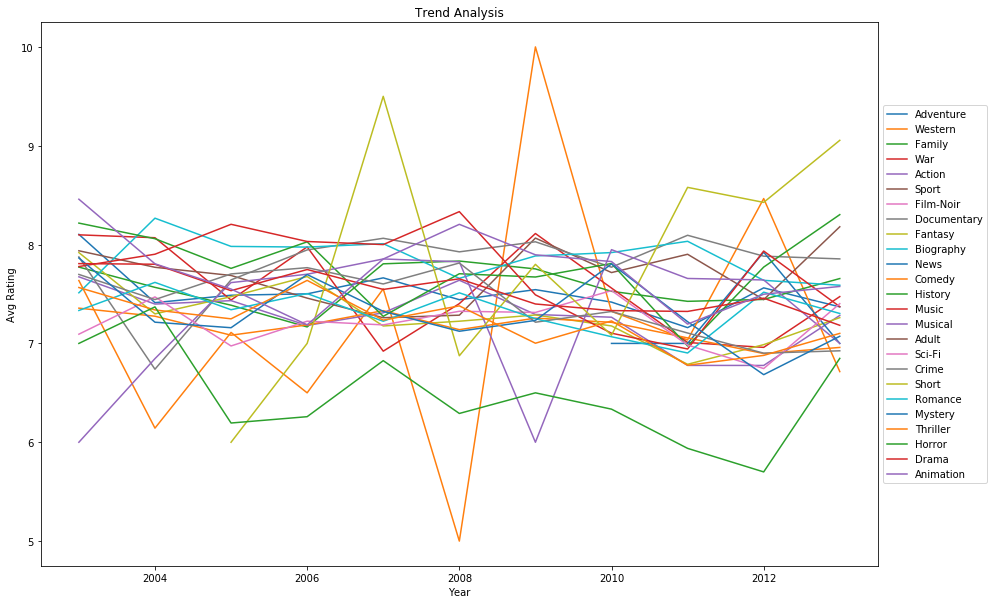

In [12]:
import matplotlib.pyplot as plt
df_last_decade.plot(figsize=(15,10))
plt.title("Trend Analysis")
plt.xlabel("Year")
plt.ylabel("Avg Rating")
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [13]:
top5_yearwise = {}
df_last_decade_T = df_last_decade.T
for col in df_last_decade_T.columns:
    top5_yearwise[col]=df_last_decade_T[col].sort_values(ascending = False)[:5]
    

In [14]:
popular_genres_decade = []
for ele in top5_yearwise:
    popular_genres_decade = popular_genres_decade+list(top5_yearwise[ele].keys().values)
    print(ele,":",top5_yearwise[ele].keys().values)

2003 : ['Short' 'Animation' 'History' 'Adventure' 'War']
2004 : ['Biography' 'War' 'History' 'Music' 'Animation']
2005 : ['Music' 'Biography' 'History' 'Crime' 'Sport']
2006 : ['Music' 'History' 'War' 'Biography' 'Documentary']
2007 : ['Short' 'Documentary' 'Biography' 'Music' 'Musical']
2008 : ['Music' 'Animation' 'Documentary' 'Family' 'Musical']
2009 : ['Western' 'War' 'Sport' 'Documentary' 'Animation']
2010 : ['Musical' 'Biography' 'Animation' 'History' 'Mystery']
2011 : ['Short' 'Documentary' 'Biography' 'Sport' 'Musical']
2012 : ['Western' 'Short' 'Music' 'News' 'Documentary']
2013 : ['Short' 'History' 'Sport' 'Documentary' 'Family']


In [15]:
set(popular_genres_decade)

{'Adventure',
 'Animation',
 'Biography',
 'Crime',
 'Documentary',
 'Family',
 'History',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Short',
 'Sport',
 'War',
 'Western'}

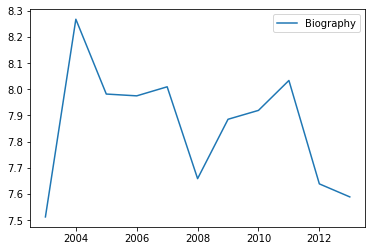

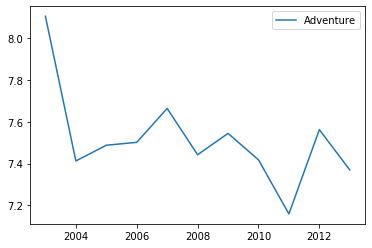

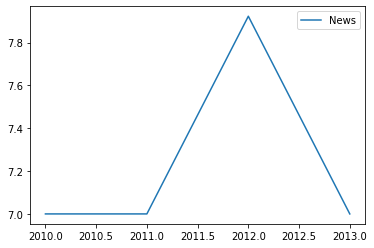

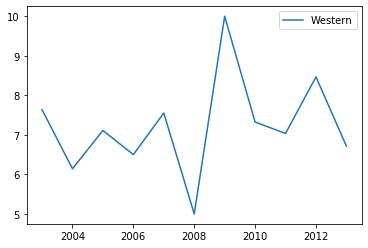

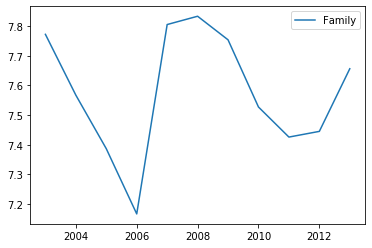

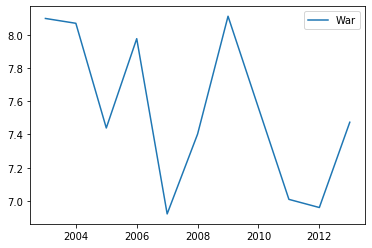

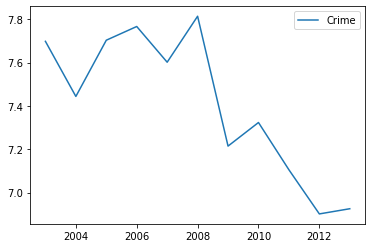

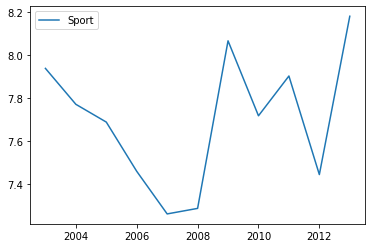

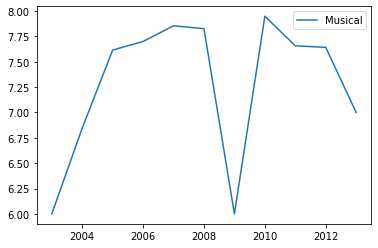

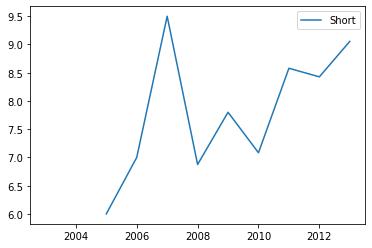

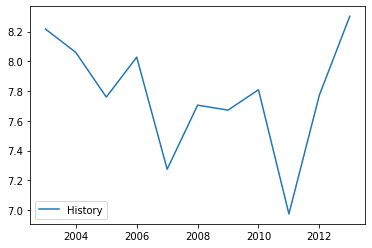

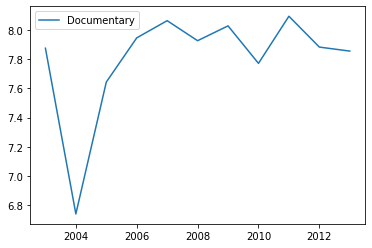

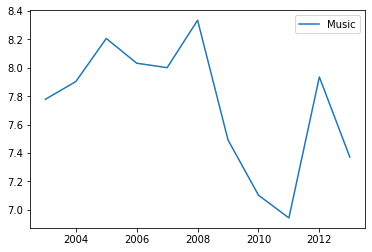

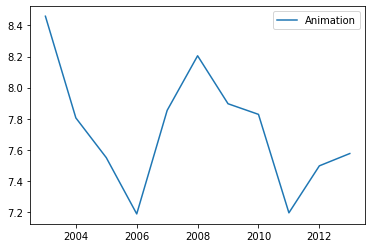

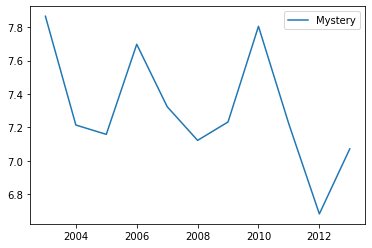

In [16]:
for g in set(popular_genres_decade):
    plt.plot(df_last_decade[[g]], )
    plt.legend([g])
    plt.show()